<a href="https://colab.research.google.com/github/horaciosrf/masters_project/blob/main/testes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalando o que for preciso

In [1]:
#!pip install welly
#!pip install wellpathpy
#!pip3 install ann_visualizer

# Testando o algoritmo

### Importando bibliotecas

In [2]:
# Bibliotecas que poderão ser usadas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from welly import Well
import lasio

In [3]:
# Importando tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation

In [4]:
# Função de normalização
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [5]:
# Função para dividir de forma aleatoria os dados 
from sklearn.model_selection import train_test_split

In [6]:
# Função para plotar modelo da Rede Neural
from tensorflow.keras.utils import plot_model

In [7]:
# Função pra visualizar a rede neural
from ann_visualizer.visualize import ann_viz

### Carregamento e pré processamento dos dados

In [8]:
# Importando o arquivo las
well_welly = Well.from_las('C:/Users/horac/Desktop/masters_project/dado_LosLobos2.las', index='ft')
well_welly.data

{'CALI': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'GR': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'NPHI': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'DPHI:1': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'DRHO': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'SP': Curve([    nan,     nan,     nan, ..., -34.795, -34.813, -34.831]),
 'ILD': Curve([  nan,   nan,   nan, ..., 2.088, 2.087, 2.09 ]),
 'ILM': Curve([  nan,   nan,   nan, ..., 2.296, 2.303, 2.293]),
 'LL8U': Curve([  nan,   nan,   nan, ..., 2.547, 2.559, 2.563]),
 'DT': Curve([   nan,    nan,    nan, ..., 123.77, 123.79, 123.77]),
 'ROP': Curve([53.777, 52.58 , 51.85 , ..., 73.   , 73.085, 73.418]),
 'GASR': Curve([  nan,   nan, 0.261, ..., 1.866, 1.845, 1.825]),
 'C1R': Curve([  nan, 2.034, 2.034, ..., 6.702, 6.705, 6.704]),
 'C2R': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'C3R': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'C4R': Curve([nan, nan, nan, ..., nan, nan, nan]),
 'KSCI': Curve([nan, nan, nan, ..., nan, na

In [9]:
# Definindo as curvas que vamos usar
well = well_welly.df(['Depth','GR','NPHI','DPHI:1','LL8C','SWT'])
well = well.reset_index(drop = False)
well

,Depth,GR,NPHI,DPHI:1,LL8C,SWT
0,120.0,NaN,NaN,NaN,NaN,NaN
1,120.5,NaN,NaN,NaN,NaN,NaN
2,121.0,NaN,NaN,NaN,NaN,NaN
3,121.5,NaN,NaN,NaN,NaN,NaN
4,122.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
5756,2998.0,NaN,NaN,NaN,2.532,NaN
5757,2998.5,NaN,NaN,NaN,2.539,NaN
5758,2999.0,NaN,NaN,NaN,2.547,NaN
5759,2999.5,NaN,NaN,NaN,2.559,NaN


In [10]:
# Nos livrando de todos NaN, conseguimos definir um intervalo de reservatório e
# com bastante dados
well = well.dropna(axis=0,how='any')
well = well.reset_index(drop = True)
well = well.reset_index(drop = False)
well


,index,Depth,GR,NPHI,DPHI:1,LL8C,SWT
0,0,1500.0,47.407,0.569,0.423,2.295,1.0000
1,1,1500.5,47.071,0.588,0.427,2.254,1.0000
2,2,1501.0,47.367,0.599,0.434,2.251,0.9540
3,3,1501.5,47.820,0.559,0.436,2.252,0.9536
4,4,1502.0,50.010,0.539,0.436,2.249,0.9335
...,...,...,...,...,...,...,...
2296,2296,2648.0,75.165,0.490,0.513,4.756,0.7239
2297,2297,2648.5,77.213,0.488,0.510,5.151,0.7249
2298,2298,2649.0,76.505,0.491,0.512,5.301,0.7362
2299,2299,2649.5,75.089,0.488,0.523,5.166,0.7117


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


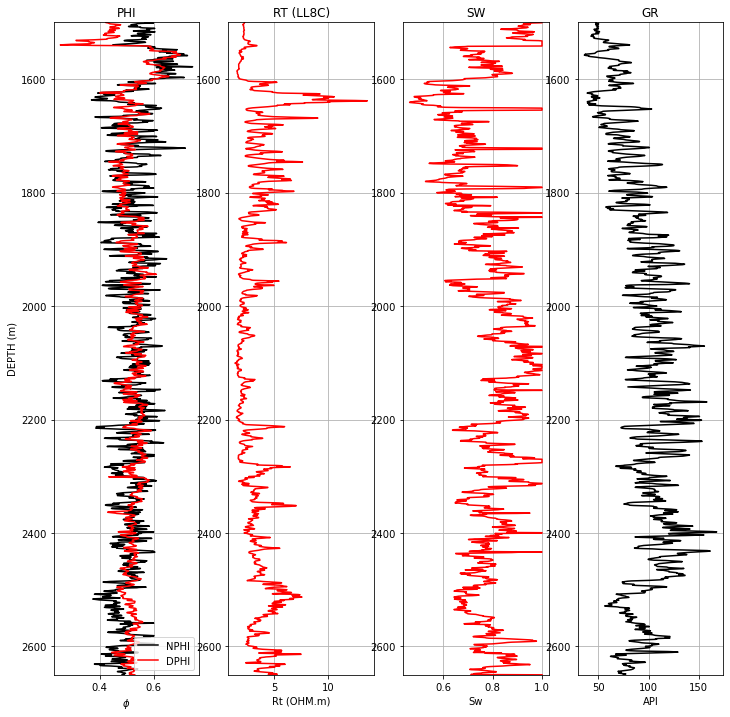

In [11]:
#Plotando para visualizar os perfis de RT, PHI e GR junto do SW
fig, ax = plt.subplots(1,4,figsize=(12,12))
ax[0].plot(well['NPHI'],well['Depth'],color='k')
ax[0].plot(well['DPHI:1'],well['Depth'],color='r')
#ax[0].plot(well['DPHI:2'],well2['Depth'],color='b')
ax[0].set(xlabel = '$\phi$', ylabel = 'DEPTH (m)')
ax[0].title.set_text('PHI')
ax[0].grid()
ax[0].legend(labels = ['NPHI','DPHI'], loc = "lower right")
ax[0].set_ylim(well['Depth'][0], well['Depth'][len(well['Depth'])-1])
ax[0].invert_yaxis()

#ax[1].plot(well['ILDC'],well2['Depth'],color='k')
ax[1].plot(well['LL8C'],well['Depth'],color='r')
#ax[1].semilogx()
ax[1].set(xlabel = 'Rt (OHM.m)')
ax[1].title.set_text('RT (LL8C)')
ax[1].grid()
#ax[1].legend(labels = ['LL8','ILD'], loc = "upper right")
ax[1].set_ylim(well['Depth'][0], well['Depth'][len(well['Depth'])-1])
ax[1].invert_yaxis()

#ax[2].plot(well['SWE'],well['Depth'],color='b')
ax[2].plot(well['SWT'],well['Depth'],color='r')
ax[2].set(xlabel = 'Sw')
ax[2].title.set_text('SW')
ax[2].grid()
#ax[1].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
ax[2].set_ylim(well['Depth'][0], well['Depth'][len(well['Depth'])-1])
ax[2].invert_yaxis()

ax[3].plot(well['GR'],well['Depth'],color='k')
ax[3].set(xlabel = 'API')
ax[3].title.set_text('GR')
ax[3].grid()
#ax[1].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
ax[3].set_ylim(well['Depth'][0], well['Depth'][len(well['Depth'])-1])
ax[3].invert_yaxis()

plt.savefig('perfis.eps', format='eps')

In [12]:
# Poço de treinamento
well2 = well.iloc[0:1151,:]
well2

,index,Depth,GR,NPHI,DPHI:1,LL8C,SWT
0,0,1500.0,47.407,0.569,0.423,2.295,1.0000
1,1,1500.5,47.071,0.588,0.427,2.254,1.0000
2,2,1501.0,47.367,0.599,0.434,2.251,0.9540
3,3,1501.5,47.820,0.559,0.436,2.252,0.9536
4,4,1502.0,50.010,0.539,0.436,2.249,0.9335
...,...,...,...,...,...,...,...
1146,1146,2073.0,141.140,0.555,0.533,1.787,0.8989
1147,1147,2073.5,136.180,0.550,0.529,1.748,0.8916
1148,1148,2074.0,122.820,0.544,0.525,1.726,0.8989
1149,1149,2074.5,113.540,0.539,0.526,1.766,0.8988


In [13]:

# Poço de teste
well3 = well.iloc[1151:2301,:]
well3 = well3.reset_index(drop = True)
well3

,index,Depth,GR,NPHI,DPHI:1,LL8C,SWT
0,1151,2075.5,101.970,0.519,0.545,1.994,0.9227
1,1152,2076.0,105.490,0.528,0.553,1.975,0.9405
2,1153,2076.5,110.430,0.552,0.557,1.877,0.9604
3,1154,2077.0,114.740,0.575,0.555,1.739,0.9643
4,1155,2077.5,116.060,0.569,0.548,1.649,0.9470
...,...,...,...,...,...,...,...
1145,2296,2648.0,75.165,0.490,0.513,4.756,0.7239
1146,2297,2648.5,77.213,0.488,0.510,5.151,0.7249
1147,2298,2649.0,76.505,0.491,0.512,5.301,0.7362
1148,2299,2649.5,75.089,0.488,0.523,5.166,0.7117


### Treinamento da regressão

In [14]:
well2.columns

Index(['index', 'Depth', 'GR', 'NPHI', 'DPHI:1', 'LL8C', 'SWT'], dtype='object')

In [15]:
# Gerando os dados de entrada
x = well3[['NPHI','LL8C']]
y = well3[['SWT']]

# Como a resistividade está com valores muito acima da porosidade, 
# temos que normalizar usando o MinMaxScaler

x[['LL8C']] = scaler.fit_transform(x[['LL8C']])
x[['NPHI']] = scaler.fit_transform(x[['NPHI']])

<ipython-input-15-6986e991d16e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[['LL8C']] = scaler.fit_transform(x[['LL8C']])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

In [16]:
# Utilizando a função train_test_split (sklearn) para dividir de forma aleatória
# os elementos dos dados 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [17]:
# Gerando o modelo
tf.random.set_seed(42)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')

model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(75, activation='relu'),
  tf.keras.layers.Dense(1, activation='linear')                        
])

# Compiling the model
model.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics = ['mae'])

# Fitting the model

history = model.fit(x_train, y_train,
                      epochs=1000, 
                      validation_data=(x_test, y_test), 
                      callbacks = [callback],
                      validation_split = 0.5)

Epoch 1/1000
15/15 [==============================] - 1s 15ms/step - loss: 0.2521 - mae: 0.2521 - val_loss: 0.1533 - val_mae: 0.1533
Epoch 2/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.1180 - mae: 0.1180 - val_loss: 0.0837 - val_mae: 0.0837
Epoch 3/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0883 - mae: 0.0883 - val_loss: 0.0741 - val_mae: 0.0741
Epoch 4/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0714 - mae: 0.0714 - val_loss: 0.0608 - val_mae: 0.0608
Epoch 5/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0622 - mae: 0.0622 - val_loss: 0.0578 - val_mae: 0.0578
Epoch 6/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0561 - mae: 0.0561 - val_loss: 0.0527 - val_mae: 0.0527
Epoch 7/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0547 - mae: 0.0547 - val_loss: 0.0659 - val_mae: 0.0659
Epoch 8/1000
15/15 [==============================] - 0s 3ms/step - loss: 0

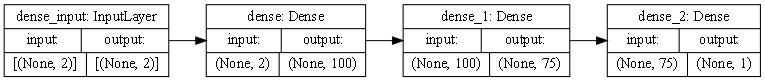

In [18]:
# Modelo da rede neural
plot_model(model, show_shapes=True, rankdir='LR', dpi=75)
# plt.savefig('model_NN.eps', format='eps')

In [19]:
# Avaliando o modelo
model.evaluate(x_test, y_test)

8/8 [==============================] - 0s 697us/step - loss: 0.0465 - mae: 0.0465


[0.046548113226890564, 0.046548113226890564]

Text(0, 0.5, 'Loss')

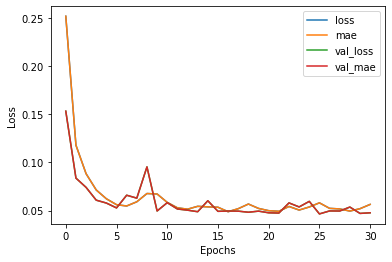

In [20]:
pd.DataFrame(history.history).plot()
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.savefig('history.eps', format='eps')

In [21]:
# Aplicando o modelo nas variáveis de entrada
pred = model.predict(x)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


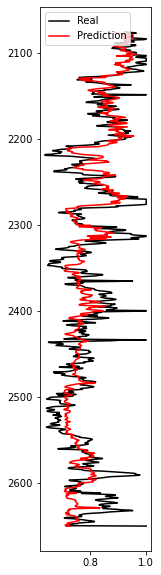

In [22]:
# Figura para comparar o dado real com o calculado
plt.figure(figsize = (2, 10))

plt.plot(well3['SWT'], well3['Depth'], color = 'k')
plt.plot(pred, well3['Depth'], color = 'red')

plt.legend(labels = [ 'Real','Prediction'])
#plt.ylim(well['Depth'][0],well['Depth'][len(well['Depth'])-1])
ax = plt.gca()
ax.invert_yaxis()

plt.savefig('perfil_sat.eps', format='eps')

In [23]:
# Vamos aplicar no poço de teste

x2 = well2[['NPHI','LL8C']]
x2[['NPHI','LL8C']] = scaler.fit_transform(x2[['NPHI','LL8C']])

pred2 = model.predict(x2)

<ipython-input-23-a5de271e8b31>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x2[['NPHI','LL8C']] = scaler.fit_transform(x2[['NPHI','LL8C']])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

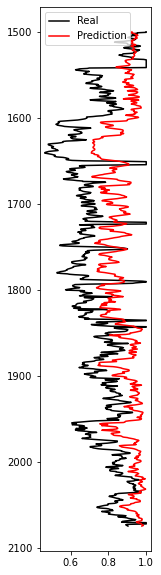

In [24]:
# Figura para comparar o dado real com o calculado
plt.figure(figsize = (2, 10))

plt.plot(well2['SWT'], well2['Depth'], color = 'k')
plt.plot(pred2, well2['Depth'], color = 'red')

plt.legend(labels = [ 'Real','Prediction'])
#plt.ylim(well1['Depth'][0],well1['Depth'][len(well1['Depth'])-1])
ax = plt.gca()
ax.invert_yaxis()

#plt.savefig('fig3.eps', format='eps')

## Corte de outlier

In [25]:
well['LL8C'][54]

2.179

In [26]:
drop_index = []
print(len(well))
for i in well['index']:
  if well['LL8C'][i] > 8:
    
    drop_index.append(i)

#print(len(well['LL8C']))
print(drop_index)

well_drop = well.drop(drop_index)

print(len(well_drop))
well_drop = well_drop.reset_index(drop = True)
well_drop


2301
[251, 252, 253, 254, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 336, 337, 338]
2268


,index,Depth,GR,NPHI,DPHI:1,LL8C,SWT
0,0,1500.0,47.407,0.569,0.423,2.295,1.0000
1,1,1500.5,47.071,0.588,0.427,2.254,1.0000
2,2,1501.0,47.367,0.599,0.434,2.251,0.9540
3,3,1501.5,47.820,0.559,0.436,2.252,0.9536
4,4,1502.0,50.010,0.539,0.436,2.249,0.9335
...,...,...,...,...,...,...,...
2263,2296,2648.0,75.165,0.490,0.513,4.756,0.7239
2264,2297,2648.5,77.213,0.488,0.510,5.151,0.7249
2265,2298,2649.0,76.505,0.491,0.512,5.301,0.7362
2266,2299,2649.5,75.089,0.488,0.523,5.166,0.7117


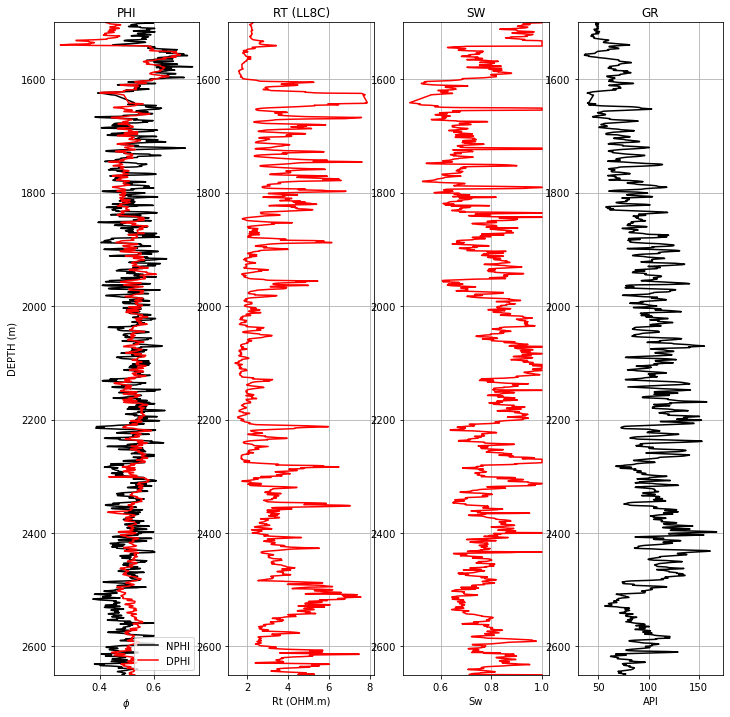

In [27]:
#Plotando para visualizar os perfis de RT, PHI e GR junto do SW
fig, ax = plt.subplots(1,4,figsize=(12,12))
ax[0].plot(well_drop['NPHI'],well_drop['Depth'],color='k')
ax[0].plot(well_drop['DPHI:1'],well_drop['Depth'],color='r')
#ax[0].plot(well['DPHI:2'],well2['Depth'],color='b')
ax[0].set(xlabel = '$\phi$', ylabel = 'DEPTH (m)')
ax[0].title.set_text('PHI')
ax[0].grid()
ax[0].legend(labels = ['NPHI','DPHI'], loc = "lower right")
ax[0].set_ylim(well_drop['Depth'][0], well_drop['Depth'][len(well_drop['Depth'])-1])
ax[0].invert_yaxis()

#ax[1].plot(well['ILDC'],well2['Depth'],color='k')
ax[1].plot(well_drop['LL8C'],well_drop['Depth'],color='r')
#ax[1].semilogx()
ax[1].set(xlabel = 'Rt (OHM.m)')
ax[1].title.set_text('RT (LL8C)')
ax[1].grid()
#ax[1].legend(labels = ['LL8','ILD'], loc = "upper right")
ax[1].set_ylim(well_drop['Depth'][0], well_drop['Depth'][len(well_drop['Depth'])-1])
ax[1].invert_yaxis()

#ax[2].plot(well['SWE'],well['Depth'],color='b')
ax[2].plot(well_drop['SWT'],well_drop['Depth'],color='r')
ax[2].set(xlabel = 'Sw')
ax[2].title.set_text('SW')
ax[2].grid()
#ax[1].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
ax[2].set_ylim(well_drop['Depth'][0], well_drop['Depth'][len(well_drop['Depth'])-1])
ax[2].invert_yaxis()

ax[3].plot(well_drop['GR'],well_drop['Depth'],color='k')
ax[3].set(xlabel = 'API')
ax[3].title.set_text('GR')
ax[3].grid()
#ax[1].legend(labels = ['Real','CNN regression', 'BP regression'], loc = "upper right")
ax[3].set_ylim(well_drop['Depth'][0], well_drop['Depth'][len(well_drop['Depth'])-1])
ax[3].invert_yaxis()

## Treinamento sem outlier

### Pré-processamento
Divindo o poço em dois poços (um de treinamento e um de teste)

In [28]:
# Treinamento
well_drop1 = well_drop.iloc[0:1134,:]
well_drop1

,index,Depth,GR,NPHI,DPHI:1,LL8C,SWT
0,0,1500.0,47.407,0.569,0.423,2.295,1.0000
1,1,1500.5,47.071,0.588,0.427,2.254,1.0000
2,2,1501.0,47.367,0.599,0.434,2.251,0.9540
3,3,1501.5,47.820,0.559,0.436,2.252,0.9536
4,4,1502.0,50.010,0.539,0.436,2.249,0.9335
...,...,...,...,...,...,...,...
1129,1162,2081.0,114.650,0.543,0.514,1.698,0.9382
1130,1163,2081.5,109.690,0.539,0.515,1.726,0.9192
1131,1164,2082.0,106.630,0.496,0.496,1.714,0.9338
1132,1165,2082.5,106.220,0.486,0.497,1.689,0.9468


In [29]:
# Poço de teste
well_drop2 = well_drop.iloc[1135:2268,:]
well_drop2 = well_drop2.reset_index(drop = True)
well_drop2

,index,Depth,GR,NPHI,DPHI:1,LL8C,SWT
0,1168,2084.0,115.000,0.553,0.554,1.695,1.0000
1,1169,2084.5,117.820,0.541,0.546,1.671,0.9904
2,1170,2085.0,120.560,0.539,0.538,1.701,0.9474
3,1171,2085.5,122.510,0.526,0.529,1.733,0.9215
4,1172,2086.0,123.210,0.519,0.532,1.689,0.9395
...,...,...,...,...,...,...,...
1128,2296,2648.0,75.165,0.490,0.513,4.756,0.7239
1129,2297,2648.5,77.213,0.488,0.510,5.151,0.7249
1130,2298,2649.0,76.505,0.491,0.512,5.301,0.7362
1131,2299,2649.5,75.089,0.488,0.523,5.166,0.7117


### Treinamento

In [30]:
# Gerando os dados de entrada
xd = well_drop1[['NPHI','LL8C']]
yd = well_drop1[['SWT']]

# Como a resistividade está com valores muito acima da porosidade, 
# temos que normalizar usando o MinMaxScaler

xd[['LL8C']] = scaler.fit_transform(xd[['LL8C']])
xd[['NPHI']] = scaler.fit_transform(xd[['NPHI']])

<ipython-input-30-4470c5ebbc83>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xd[['LL8C']] = scaler.fit_transform(xd[['LL8C']])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

In [31]:
# Utilizando a função train_test_split (sklearn) para dividir de forma aleatória
# os elementos dos dados 

xd_train, xd_test, yd_train, yd_test = train_test_split(xd, yd, test_size = 0.2, random_state = 42)

In [32]:
# Gerando o modelo
tf.random.set_seed(42)

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')

modeld = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(75, activation='relu'),
  tf.keras.layers.Dense(1, activation='linear')                        
])

# Compiling the model
modeld.compile(loss = tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics = ['mae'])

# Fitting the model

historyd = modeld.fit(x_train, y_train,
                      epochs=1000, 
                      validation_data=(xd_test, yd_test), 
                      callbacks = [callback],
                      validation_split = 0.5)

Epoch 1/1000
15/15 [==============================] - 1s 14ms/step - loss: 0.2521 - mae: 0.2521 - val_loss: 0.1533 - val_mae: 0.1533
Epoch 2/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.1180 - mae: 0.1180 - val_loss: 0.0837 - val_mae: 0.0837
Epoch 3/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0883 - mae: 0.0883 - val_loss: 0.0741 - val_mae: 0.0741
Epoch 4/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0714 - mae: 0.0714 - val_loss: 0.0608 - val_mae: 0.0608
Epoch 5/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0622 - mae: 0.0622 - val_loss: 0.0578 - val_mae: 0.0578
Epoch 6/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.0561 - mae: 0.0561 - val_loss: 0.0527 - val_mae: 0.0527
Epoch 7/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.0547 - mae: 0.0547 - val_loss: 0.0659 - val_mae: 0.0659
Epoch 8/1000
15/15 [==============================] - 0s 2ms/step - loss: 0

In [33]:
# Modelo da rede neural
plot_model(modeld,rankdir='LR', show_shapes=True, dpi=75)
#rankdir='LR'
plt.savefig('model1.eps', format='eps')

<Figure size 432x288 with 0 Axes>

In [34]:
# Modelo da rede neural pelo ann_visualizer
#ann_viz(modeld, title="Regressão");

In [35]:
# Avaliando o modelo
model.evaluate(xd_test, yd_test)

8/8 [==============================] - 0s 2ms/step - loss: 0.0954 - mae: 0.0954


[0.09541548788547516, 0.09541548788547516]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


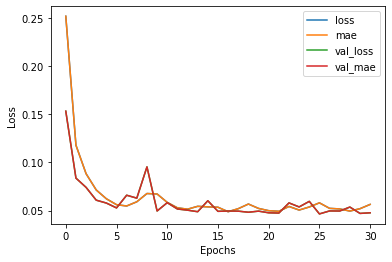

In [36]:
pd.DataFrame(historyd.history).plot()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('history.eps', format='eps')

In [37]:
# Aplicando o modelo nas variáveis de entrada
predd = modeld.predict(xd)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


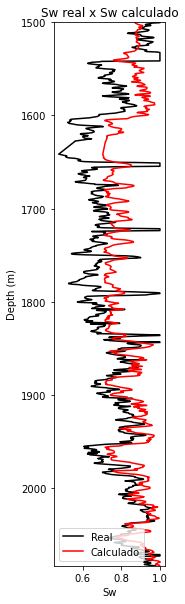

In [67]:
# Figura para comparar o dado real com o calculado
plt.figure(figsize = (2, 10))

plt.plot(well_drop1['SWT'], well_drop1['Depth'], color = 'k')
plt.plot(predd, well_drop1['Depth'], color = 'red')
plt.title('Sw real x Sw calculado')
plt.legend(labels = [ 'Real','Calculado'])
plt.xlabel('Sw')
plt.ylabel('Depth (m)')
plt.ylim(well_drop1['Depth'][0],well_drop1['Depth'][len(well_drop1['Depth'])-1])
ax = plt.gca()
ax.invert_yaxis()

plt.savefig('perfil2.eps', format='eps', bbox_inches='tight')

In [39]:
xd2 = well_drop2[['NPHI','LL8C']]
xd2[['NPHI','LL8C']] = scaler.fit_transform(xd2[['NPHI','LL8C']])

predd2 = modeld.predict(xd2)

<ipython-input-39-0bd0143e72da>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xd2[['NPHI','LL8C']] = scaler.fit_transform(xd2[['NPHI','LL8C']])
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


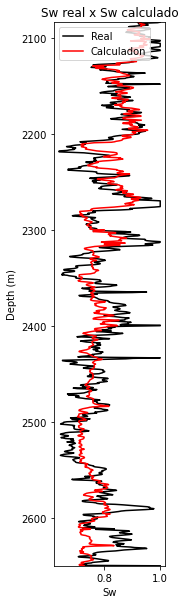

In [68]:
# Figura para comparar o dado real com o calculado
plt.figure(figsize = (2, 10))

plt.plot(well_drop2['SWT'], well_drop2['Depth'], color = 'k')
plt.title('Sw real x Sw calculado')
plt.plot(predd2, well_drop2['Depth'], color = 'red')
plt.legend(labels = [ 'Real','Calculadon'])
plt.xlabel('Sw')
plt.ylabel('Depth (m)')
plt.ylim(well_drop2['Depth'][0],well_drop2['Depth'][len(well_drop2['Depth'])-1])
ax = plt.gca()
ax.invert_yaxis()

plt.savefig('perfil3.eps', format='eps',bbox_inches='tight')

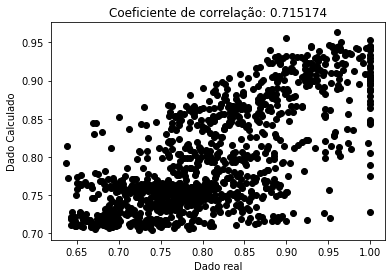

In [49]:
# Crossplot
plt.scatter(well_drop2['SWT'], predd2, color = 'k')
plt.xlabel('Dado real')
plt.ylabel('Dado Calculado')
plt.title('Coeficiente de correlação: 0.715174')
plt.savefig('crossplot.eps', format='eps')

In [ ]:
from sklearn.metrics import r2_score
r2_score(well_drop2['SWT'], predd2)

#R2

0.48991211765832987

In [ ]:
yarr = well_drop2['SWT'].to_numpy()
xarr = predd2.reshape((1133,))

np.corrcoef(yarr, xarr)

array([[1.        , 0.71517448],
       [0.71517448, 1.        ]])

In [ ]:
predd22 = pd.DataFrame(predd2, columns=['SWT'])

well_drop2['SWT'].corr(predd22['SWT'])


0.7151744752128085